#  Engagement to Conversion

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Loading Data

In [3]:
df = pd.read_csv('dataset/bank-full.csv', sep=";")

In [4]:
df.shape

(45211, 17)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# y값을 Conversion으로 0,1로 구분
df['conversion'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


# 2. Data Analysis

In [9]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y',
 'conversion']

#### - Conversion Rate

In [10]:
conversion_rate_df = pd.DataFrame(df.groupby('conversion').count()['y'] / df.shape[0] * 100.0)

In [11]:
conversion_rate_df

,y
conversion,
0,88.30152
1,11.69848


In [12]:
conversion_rate_df.T

conversion,0,1
y,88.30152,11.69848


#### - Conversion Rates by Marital Status

In [13]:
# 가족의 형태 에 따라 rate 계산
conversion_rate_by_marital = df.groupby(by='marital')['conversion'].sum() / df.groupby(by='marital')['conversion'].count() * 100.0

In [14]:
conversion_rate_by_marital

marital
divorced    11.945458
married     10.123466
single      14.949179
Name: conversion, dtype: float64

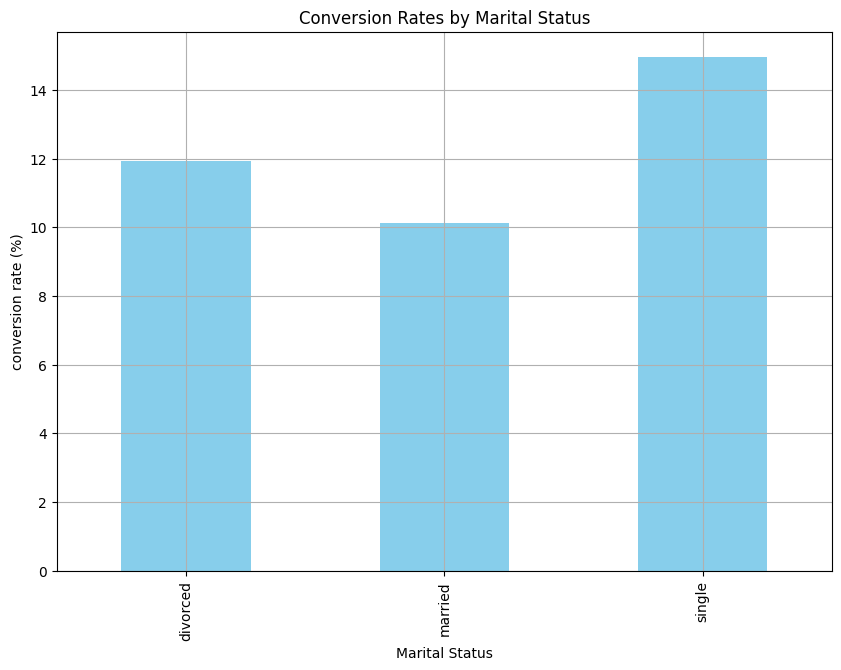

In [15]:
# bar chart로 시각화
ax = conversion_rate_by_marital.plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Marital Status'
)

ax.set_xlabel('Marital Status')
ax.set_ylabel('conversion rate (%)')

plt.show()

#### - Conversion Rates by Job

In [16]:
# 직업의 형태에 따라 rate 계산
conversion_rate_by_job = df.groupby(by='job')['conversion'].sum() / df.groupby(by='job')['conversion'].count() * 100.0

In [17]:
conversion_rate_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: conversion, dtype: float64

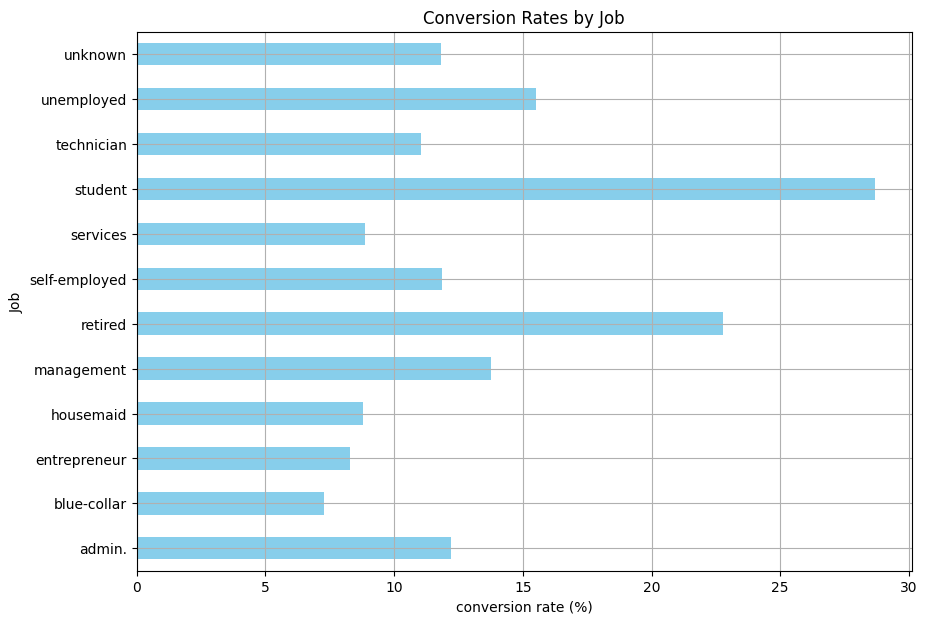

In [18]:
# bar 수평 차트로 시각화
ax = conversion_rate_by_job.plot(
    kind='barh',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Job'
)

ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')

plt.show()

#### - Default Rates by Conversions
Differs between subcsribed a term deposit and did not

In [19]:
# Default Rate로 conversion 열로 피벗테이블 만들기
default_by_conversion_df = pd.pivot_table(df, values='y', 
                                          index='default', columns='conversion', aggfunc=len)

In [20]:
default_by_conversion_df

conversion,0,1
default,,
no,39159,5237
yes,763,52


In [21]:
default_by_conversion_df.columns = ['non_conversions', 'conversions']

In [22]:
default_by_conversion_df

,non_conversions,conversions
default,,
no,39159,5237
yes,763,52


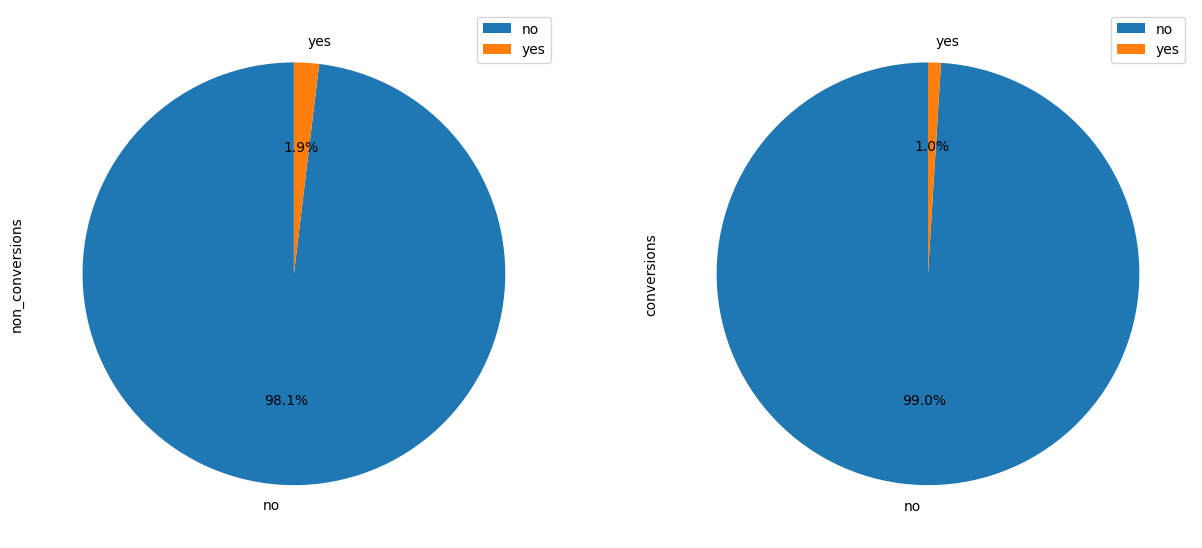

In [23]:
# pie 차트로 시각화
default_by_conversion_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

#### - Bank Balance by Conversions

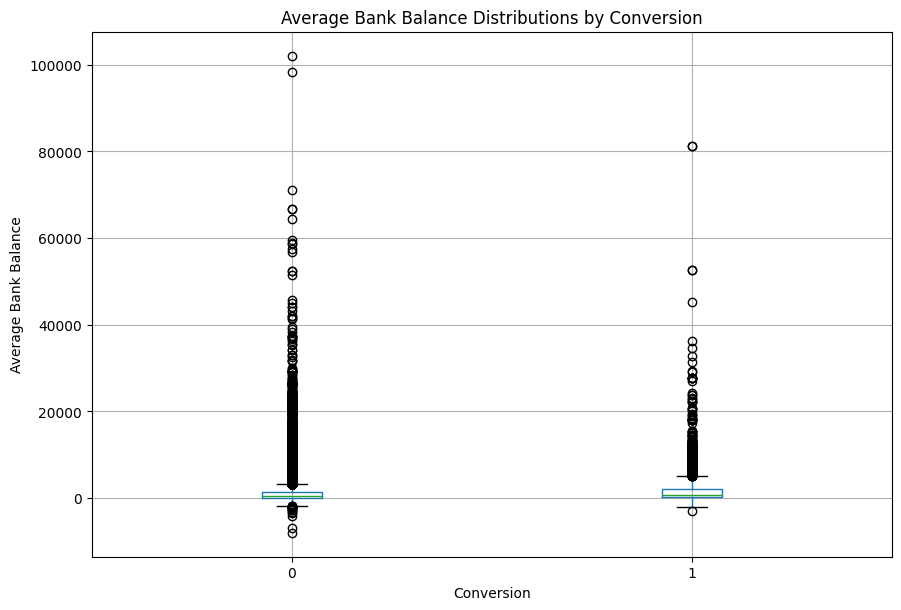

In [24]:
# Marketing으로 balance 개설한 고객과 아닌 고객을 비교하기 위한 boxplot 그리기

ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=True, # outlier 1.5 IQR 보기
    figsize=(10, 7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

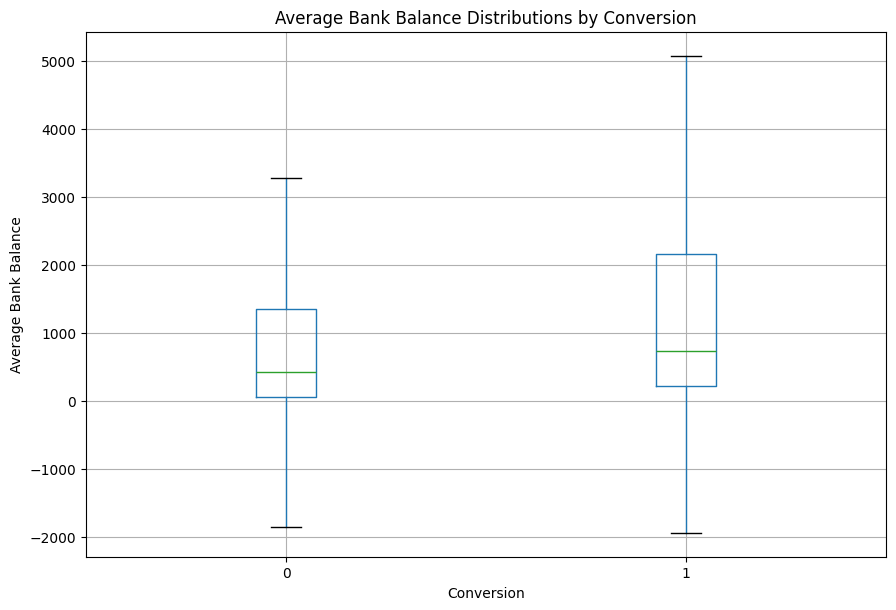

In [25]:
ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=False, # # outlier 1.5 IQR 보지않기
    figsize=(10, 7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

#### - Conversions by Number of Contacts

In [26]:
# Campaign 횟수로 예금 개설한 고객의 % 비율
conversions_by_num_contacts = df.groupby(by='campaign')['conversion'].sum() / df.groupby(by='campaign')['conversion'].count() * 100.0

In [27]:
pd.DataFrame(conversions_by_num_contacts)

,conversion
campaign,
1,14.597583
2,11.203519
3,11.193624
4,9.000568
5,7.879819
6,7.126259
7,6.394558
8,5.925926
9,6.422018


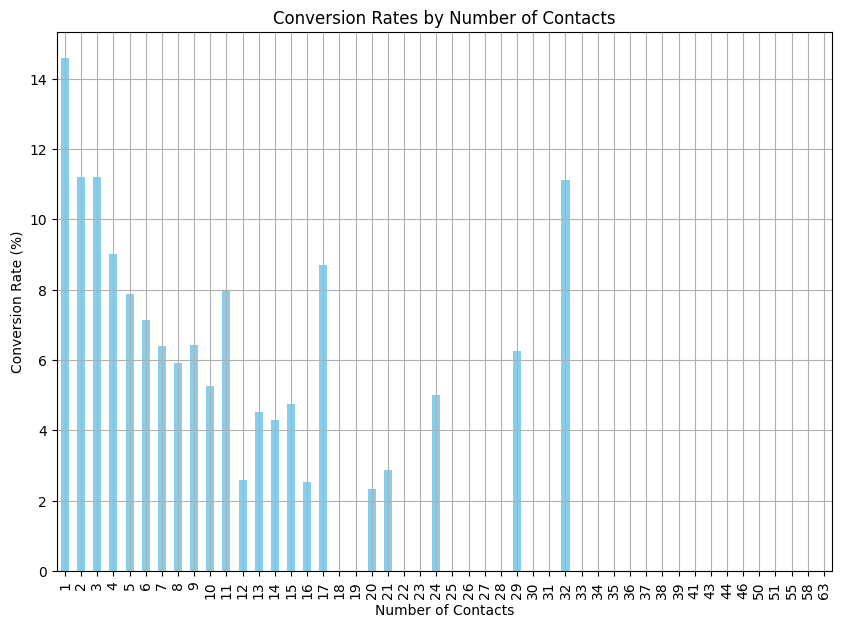

In [28]:
# bar 차트로 시각화
ax = conversions_by_num_contacts.plot(
    kind='bar',
    figsize=(10, 7),
    title='Conversion Rates by Number of Contacts',
    grid=True,
    color='skyblue'
)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

# 3. Encoding Categorical Variables

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  y           45211 non-null  object
 17  conversion  45211 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [30]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y',
 'conversion']

In [31]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,conversion
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [32]:
categorical_vars = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month'
]

In [33]:
# nunique()로 unique한 value count 하기
df[categorical_vars].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
dtype: int64

#### - encoding 'month'

In [34]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [35]:
# 문자열 months를 months.index를 사용하여 int로 변환
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df['month'] = df['month'].apply(lambda x: months.index(x)+1)

In [36]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

In [37]:
type(df.month)

pandas.core.series.Series

In [38]:
# 월별로 count 하기
df.groupby('month').count()['conversion']

month
1      1403
2      2649
3       477
4      2932
5     13766
6      5341
7      6895
8      6247
9       579
10      738
11     3970
12      214
Name: conversion, dtype: int64

#### - encoding 'job'

In [39]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [40]:
jobs_encoded_df = pd.get_dummies(df['job'])
jobs_encoded_df.columns = ['job_%s' % x for x in jobs_encoded_df.columns]

In [41]:
jobs_encoded_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True


In [42]:
# df와 jobs_dncoded_df를 concat으로 열 합치기
df = pd.concat([df, jobs_encoded_df], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,False,False,True,False,False,False,False,False,False,False
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,False,False,False,False,False,False,False,True,False,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,True,False,False,False,False,False,False,False,False,False
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,False,False,False,False,False,False,False,False,False,False
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,False,False,False,False,False,False,False,False,False,True


#### - encoding 'marital'

In [43]:
marital_encoded_df = pd.get_dummies(df['marital'])
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df.columns]

In [44]:
marital_encoded_df.head()

,marital_divorced,marital_married,marital_single
0,False,True,False
1,False,False,True
2,False,True,False
3,False,True,False
4,False,False,True


In [45]:
df = pd.concat([df, marital_encoded_df], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,False,False,False,False,False,False,False,False,True,False
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,False,False,False,False,True,False,False,False,False,True
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,False,False,False,False,False,False,False,False,True,False
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,False,False,False,False,False,False,False,False,True,False
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,False,False,False,False,False,False,True,False,False,True


#### - encoding 'housing'

In [46]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [47]:
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)

#### - encoding 'loan'

In [48]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [49]:
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

# 4. Fitting Decision Trees

In [50]:
# x features 
features = [
    'age',
    'balance',
    'campaign',
    'previous',
    'housing',
] + list(jobs_encoded_df.columns) + list(marital_encoded_df.columns)

# y target 값
response_var = 'conversion'

In [51]:
features

['age',
 'balance',
 'campaign',
 'previous',
 'housing',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single']

In [52]:
from sklearn import tree

In [53]:
dt_model = tree.DecisionTreeClassifier(max_depth=4)

In [54]:
dt_model.fit(df[features], df[response_var])

DecisionTreeClassifier(max_depth=4)

In [55]:
dt_model.classes_

array([0, 1])

# 5. Interpreting Decision Tree Model

In [56]:
# pip install graphviz

import graphviz

In [57]:
dot_data = tree.export_graphviz(
    dt_model, 
    out_file=None, 
    feature_names=features,  
    class_names=['0', '1'],  
    filled=True, 
    rounded=True,  
    special_characters=True
) 

In [58]:
graph = graphviz.Source(dot_data)

/tmp/ipykernel_993951/2769644622.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


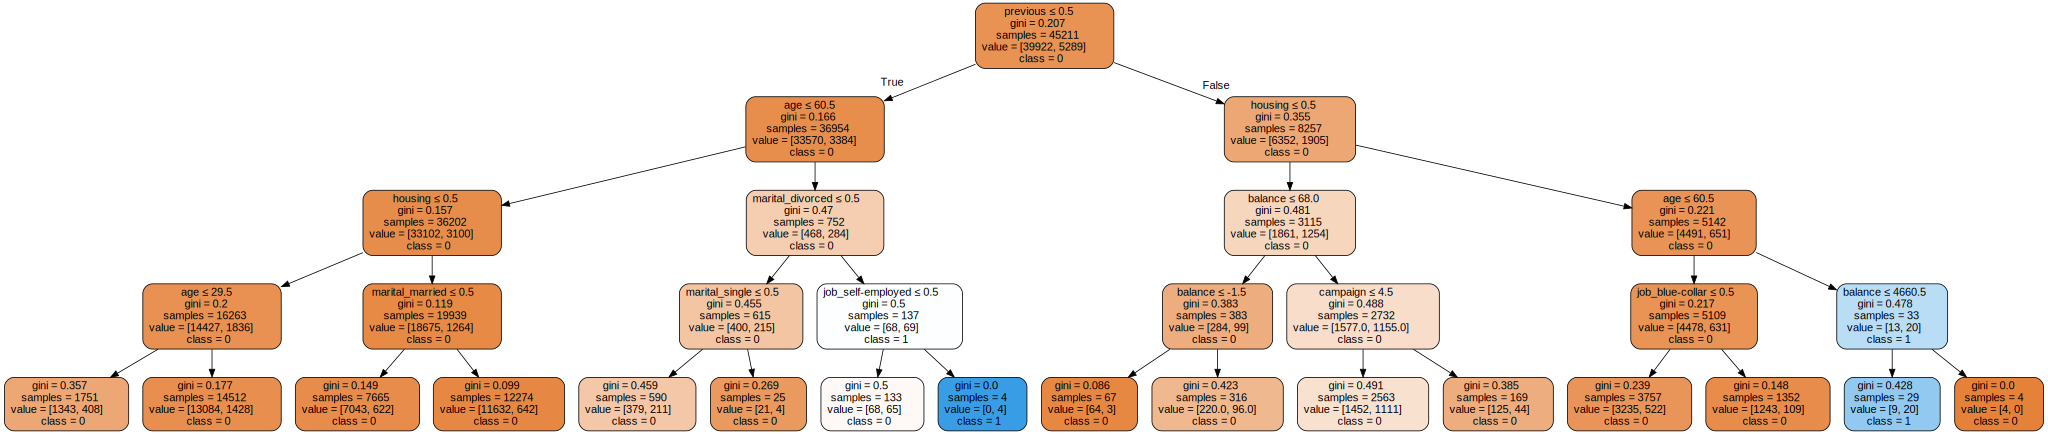

In [59]:
from IPython.core.display import display, HTML
display(HTML("<style>text {font-size: 10px;}</style>"))

graph